In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


About This Data

This is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. The dataset includes hotel location, name, rating, review data, title, username, and more.

Note that this is a sample of a large dataset. The full dataset is available through Datafiniti.
What You Can Do With This Data

You can use this data to compare hotel reviews on a state-by-state basis; experiment with sentiment scoring and other natural language processing techniques. The review data lets you correlate keywords in the review text with ratings. E.g.:

    What are the bottom and top states for hotel reviews by average rating?
    What is the correlation between a state’s population and their number of hotel reviews?
    What is the correlation between a state’s tourism budget and their number of hotel reviews?

Data Schema

A full schema for the data is available in our support documentation.
About Datafiniti

Datafiniti provides instant access to web data. We compile data from thousands of websites to create standardized databases of business, product, and property information. Learn more.
Interested in the Full Dataset?

You can access the full dataset by running the following query with Datafiniti’s Business API.

{ "query": "dateUpdated:[2018-01-01 TO *] AND categories:(Hotel OR Hotels) AND country:US* AND name:* AND reviews:* AND sourceURLs:*", "format": "csv", "download": true }

*The total number of results may vary.

Get this data and more by creating a free Datafiniti account or requesting a demo.

#1.Loading required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
!pip install geopandas
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import operator
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix,mean_squared_error,accuracy_score, plot_confusion_matrix
!pip install gensim
from textblob import TextBlob
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import LsiModel,LdaModel,HdpModel, CoherenceModel
from pprint import pprint
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2.Hotel reviews data set loading

In [ ]:
file_path = "/content/drive/My Drive/Nlp/Hotel_ reviews/datas/7282_1.csv"
file_path 

'/content/drive/My Drive/Nlp/Hotel_ reviews/datas/7282_1.csv'

In [ ]:
hotel_reviews = pd.read_csv(file_path,sep=',', na_values=' ')

In [ ]:
df = hotel_reviews.copy()

# 3.Exploratory Data Analysis

**objective:** 
- brief data analysis of the row hotel reviews data set, to establish a futher strategies in deep data analysis 
- in the deep data analysis, the aim is to provid a report regarding all types of added value reagarding the the data in hotel reviews data set

## 3.1 Brief data analysis

**Defined the targets variable a personnal NLP Project:** <br>
- "reviews.rating" - hotel's custumer rating<br>

**Dataset shape:** 35912, 26<br>

**variables type:** <br>
object    21<br>
float64    5<br>

- 5 variables float type(1 qualitative"reviews.rating"/2 goegraphical"latitude,longitude"/ 2 others to be drop because full of Nan values ) <br>
- 21 variables object type(to be analysied deeply in the future)<br>

**NA variables analysis:** <br>
- the dataset has a lot NA values, we will for sure in the future drop them above 50% Nan values and also esthablish a strategy to fill some<br><br>

**Duplicated variables analysis:**<br>
- the dataset has 4 duplicated values, we will drop them in the future<br> 

In [ ]:
df.head()

address categories      city country   latitude  longitude                name postalCode province          reviews.date     reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating                                       reviews.text                       reviews.title reviews.userCity reviews.username reviews.userProvince Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             4.0  Pleasant 10 min walk along the sea front to th...  Good location away from the crouds              NaN      Russ (kent)                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  Really lovely hotel. Stayed on the very top fl...      Great hotel with Jacuzzi bath!              NaN       A Traveler                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  Ett mycket bra hotell. Det som drog ner betyge...                         Lugnt l��ge              NaN             Maud                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  We stayed here for four nights in October. The...          Good location on the Lido.              NaN            Julie                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  We stayed here for four nights in October. The...              ������ ���������������              NaN         sungchul                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN

In [ ]:
df.tail()

address                                         categories          city country   latitude  longitude                                           name postalCode province          reviews.date     reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating                                       reviews.text                reviews.title reviews.userCity reviews.username reviews.userProvince Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25
35907  1088 Powdermill Rd  Cabins,Resorts & Vacation Cottages,Wedding Cha...    Gatlinburg      US  35.754868 -83.457295                             Elk Springs Resort      37738       TN  2012-03-20T00:00:00Z  2016-06-23T16:50:58Z                  NaN         NaN             5.0  Best of the Best!!!! My family and I stayed in...  Amazing time (both times!!)        Charlotte        Chelsa K.                   NC         NaN         NaN         NaN         NaN         NaN         NaN         NaN
35908  1088 Powdermill Rd  Cabins,Resorts & Vacation Cottages,Wedding Cha...    Gatlinburg      US  35.754868 -83.457295                             Elk Springs Resort      37738       TN  2012-03-12T00:00:00Z  2016-06-23T16:50:58Z                  NaN         NaN             5.0  Amazing Vacation in Beautiful Cabin We stayed ...  Amazing time (both times!!)        Charlotte       Heather D.                   NC         NaN         NaN         NaN         NaN         NaN         NaN         NaN
35909  1088 Powdermill Rd  Cabins,Resorts & Vacation Cottages,Wedding Cha...    Gatlinburg      US  35.754868 -83.457295                             Elk Springs Resort      37738       TN  2015-11-03T00:00:00Z  2016-06-23T16:50:58Z                  NaN         NaN             5.0  My husband and I stayed at Tree Tops which is ...  Amazing time (both times!!)        Charlotte         Carol W.                   NC         NaN         NaN         NaN         NaN         NaN         NaN         NaN
35910    3747 29th St S E  Hotels-Apartment,Corporate Lodging,Hotels,Lodging  Grand Rapids      US  42.909480 -85.573590  Extended Stay America Grand Rapids - Kentwood      49512       MI                   NaN  2015-12-01T19:40:54Z                  NaN         NaN             0.0  to share your opinion of this businesswith YP ...                          NaN              NaN   write a review                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
35911    3747 29th St S E  Hotels-Apartment,Corporate Lodging,Hotels,Lodging  Grand Rapids      US  42.909480 -85.573590  Extended Stay America Grand Rapids - Kentwood      49512       MI                   NaN  2015-12-01T19:40:54Z                  NaN         NaN             0.0         xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx                          NaN              NaN   xxxxxxxxxxxxxx                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN

In [ ]:
# dataset's shape
df.shape

(35912, 26)

In [ ]:
# dataset's features types analysis
df.dtypes.value_counts()

object     21
float64     5
dtype: int64

In [ ]:
# dataset's features types analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35890 non-null  object 
 15  reviews.title      

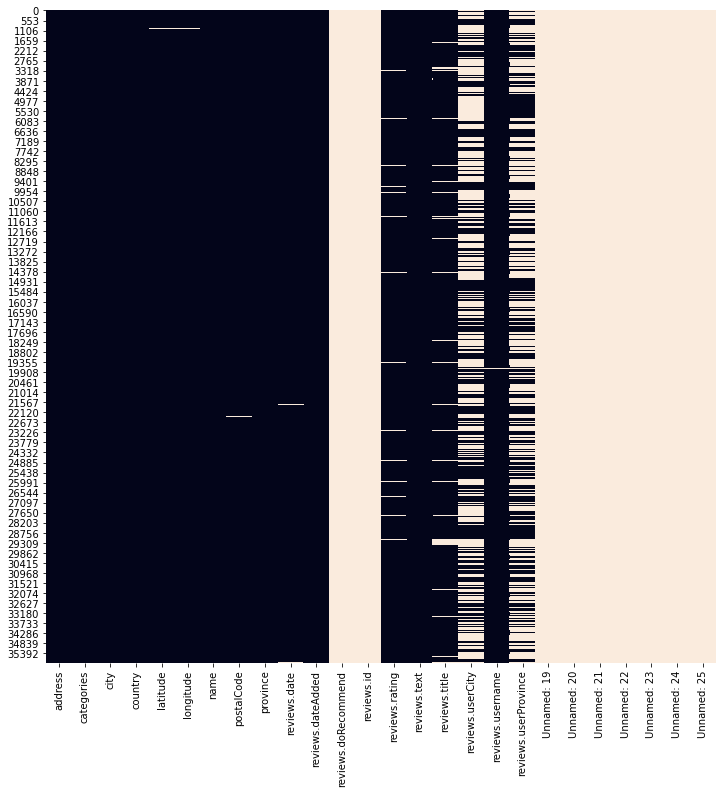

In [ ]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
# dataset's NA values analysis
((df.isna().sum()/df.shape[0]).sort_values(ascending=True))*100

address                   0.000000
province                  0.000000
name                      0.000000
reviews.dateAdded         0.000000
city                      0.000000
categories                0.000000
country                   0.000000
reviews.text              0.061261
postalCode                0.153152
latitude                  0.239474
longitude                 0.239474
reviews.username          0.239474
reviews.date              0.721207
reviews.rating            2.400312
reviews.title             4.522165
reviews.userProvince     51.141680
reviews.userCity         54.577857
Unnamed: 19              99.891401
Unnamed: 20              99.977723
Unnamed: 21              99.988862
Unnamed: 22              99.994431
Unnamed: 23              99.997215
Unnamed: 25              99.997215
Unnamed: 24              99.997215
reviews.doRecommend     100.000000
reviews.id              100.000000
dtype: float64

In [ ]:
# dataset's duplicated analysis
df.duplicated().sum()

4

## 3.2 Deep data's Target/features and values analytics

**Brief features engineering:** <br>

- Drop of the duplicates

**Most value added features names & values analysis about NLP approch:**<br>

- reviews.text: reviews  given by the client
- reviews.title: reviews title given by the client
- reviews.rating: client's reviews rates
- latitude:  geograghical position 
- longitude:  geograghical position
- province: hotel's US's state
- reviews.rating: client's reviews rates

Text analyse nlp's approch(sentiment analysis and topic modeling):
- reviews.text/reviews.title have value added. Probabely, in the future will concatenate to one future for more efficiency.
- we don't have only english and our corpus of processing is in english
- we have some NaN values will drop them
- we have also abnormal reviews (text message style), in the future we will have to establish a startegy about it
     

**Target variable visulisation :** <br>
- 'reviews.rating': rate scale between 0 and 5
- As per the **"target variable"** 'reviews.rating' plot on  a goegraphical world map, we can highlightted those target's locations must be client's locations because the hotels are located in the US<br>

- we can observe a state's reviews.rating mean below 2.5/5, probably it we will be interesting to analyses deeper if can find some reason about it<br>

In [ ]:
df.head()

address categories      city country   latitude  longitude                name postalCode province          reviews.date     reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating                                       reviews.text                       reviews.title reviews.userCity reviews.username reviews.userProvince Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             4.0  Pleasant 10 min walk along the sea front to th...  Good location away from the crouds              NaN      Russ (kent)                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  Really lovely hotel. Stayed on the very top fl...      Great hotel with Jacuzzi bath!              NaN       A Traveler                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  Ett mycket bra hotell. Det som drog ner betyge...                         Lugnt l��ge              NaN             Maud                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  We stayed here for four nights in October. The...          Good location on the Lido.              NaN            Julie                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN             5.0  We stayed here for four nights in October. The...              ������ ���������������              NaN         sungchul                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN

###3.2.1 Brief features engineering

In [ ]:
#drop the duplicate
df=df.drop_duplicates()

###3.2.2 Most value added features names & values analysis about NLP approch

- reviews.text: reviews  given by the client
- reviews.title: reviews title given by the client
- reviews.rating: client's reviews rates

Text analyse nlp's approch(sentiment analysis and topic modeling):
- reviews.text/reviews.title have value added. Probabely, in the future will concatenate to one future for more efficiency.
- we don't have only english and our corpus of processing is in english
- we have some NaN values will drop them
- we have also abnormal reviews, in the future we will have to establish a startegy about it 



In [ ]:
df[['reviews.text','reviews.title', 'reviews.rating']]

reviews.text                       reviews.title  reviews.rating
0      Pleasant 10 min walk along the sea front to th...  Good location away from the crouds             4.0
1      Really lovely hotel. Stayed on the very top fl...      Great hotel with Jacuzzi bath!             5.0
2      Ett mycket bra hotell. Det som drog ner betyge...                         Lugnt l��ge             5.0
3      We stayed here for four nights in October. The...          Good location on the Lido.             5.0
4      We stayed here for four nights in October. The...              ������ ���������������             5.0
...                                                  ...                                 ...             ...
35907  Best of the Best!!!! My family and I stayed in...         Amazing time (both times!!)             5.0
35908  Amazing Vacation in Beautiful Cabin We stayed ...         Amazing time (both times!!)             5.0
35909  My husband and I stayed at Tree Tops which is ...         Amazing time (both times!!)             5.0
35910  to share your opinion of this businesswith YP ...                                 NaN             0.0
35911         xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx                                 NaN             0.0

[35908 rows x 3 columns]

- latitude:  geograghical position 
- longitude:  geograghical position
- province: hotel's US's state
- reviews.rating: client's reviews rates

In [ ]:
unique_values_df=df[['latitude','longitude','province','reviews.rating']]

In [ ]:
for col in unique_values_df.columns:
    print (f'{col:-<50} {unique_values_df[col].unique()}')

latitude------------------------------------------ [ 45.421611    40.68973     34.664684    28.793795    33.802822
  29.681085    33.620773    46.933598    37.698349    42.130338
  41.44144     30.03867     35.50517     45.53678     30.684177
  21.281574    54.1533      44.304794    29.768461    47.686226
  44.57059     42.621235    38.96124     38.14468     34.06241
  43.36319     20.90572     35.463253    26.174261    36.65133
  43.56077             nan  29.836717    33.9534      31.693611
  36.84766     51.295746    34.57757     44.63752     42.78621
  44.407978    40.189476    39.5639      40.814148    39.094056
  35.82745     39.6387      34.43614     39.75622     38.958709
  33.538586    33.683724    38.00622     47.09124     48.470364
  43.772349    37.8228      29.773048    37.929938    47.302352
  38.5802767   42.436007    48.391121    33.843213    39.176128
  48.10485     44.96541     37.967532    34.89095     40.363297
  43.596927    44.47582     26.697607    31.329254    42

###3.2.3 Target variable visulisation 

In [ ]:
dataframe_filepath = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, crs='epsg:4326', geometry=geometry)

- As per that target plot on 'reviews.rating', i m guesting those locations are client's locations because the hotels are located in the US

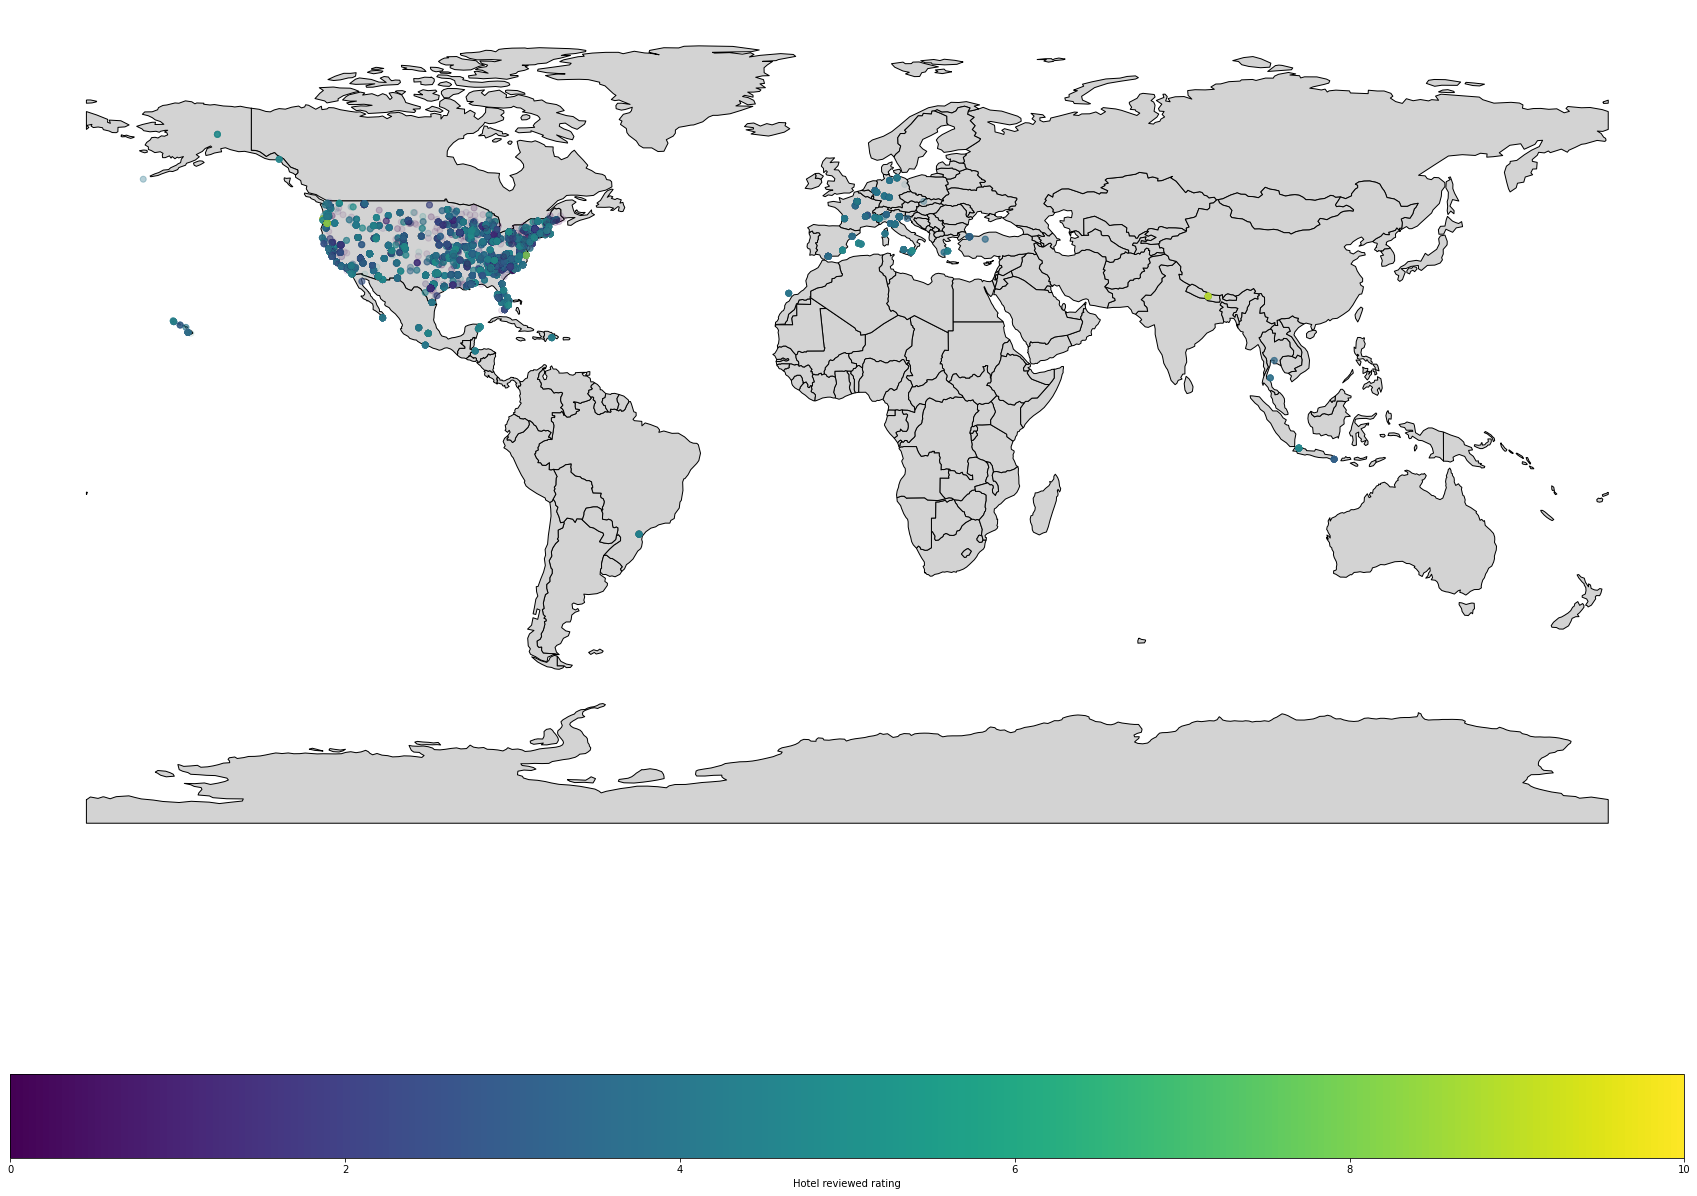

In [ ]:
fig = plt.figure(figsize=(30, 26))
ax= fig.add_subplot(111) 
dataframe_filepath.plot(ax=ax, color='lightgray', edgecolor='black')
geo_df.plot(column='reviews.rating',legend=True,legend_kwds={'label': "Hotel reviewed rating",'orientation': "horizontal"}, ax=ax, alpha=.1)
ax.axis('off')
plt.show()

- we can obseerve the values of  "reviews.rating" is float and rates are between 0.0 and 10.0 As per common knowlege, we know hotel's review rates are between integer 0 and 5.
- we can observe the hotel's clients are from all around the world as per their geolocalisation

In [ ]:
df["reviews.rating"].value_counts()


5.0     12670
4.0      9754
3.0      5708
1.0      3066
2.0      2979
0.0       337
10.0      101
9.6        53
9.2        49
4.3        26
4.8        25
8.3        25
7.9        24
7.5        24
8.8        24
4.2        22
3.4        17
4.1        14
6.3        14
7.1        13
4.5        13
6.7        12
5.4         9
4.6         7
3.1         7
5.8         6
4.4         6
3.3         6
4.7         6
4.9         6
2.4         4
2.5         3
3.8         3
3.7         2
3.2         2
3.9         2
2.8         1
1.3         1
9.5         1
1.5         1
6.0         1
2.9         1
7.0         1
Name: reviews.rating, dtype: int64

- reviews rate standardisation integer from 0 to 5

In [ ]:
df=df[df["reviews.rating"]<=5]

In [ ]:
df['reviews_rating']=df["reviews.rating"].astype(int)

In [ ]:
df=df.drop("reviews.rating", axis=1)

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, crs='epsg:4326', geometry=geometry)

In [ ]:
(df['reviews_rating'].value_counts(ascending=True)/df.shape[0])*100

0     0.971490
2     8.613682
1     8.844302
3    16.567212
4    28.478768
5    36.524547
Name: reviews_rating, dtype: float64

In [ ]:
df["province"].value_counts()

CA                              3821
VA                              2620
TX                              1797
FL                              1399
NY                              1228
GA                              1216
PA                              1052
MI                               924
CO                               841
LA                               667
OH                               629
SC                               612
MA                               611
IL                               586
TN                               577
WA                               551
IA                               549
NV                               480
WI                               469
MS                               454
MN                               423
OR                               404
MO                               395
NC                               388
ME                               380
AL                               367
AR                               356
I

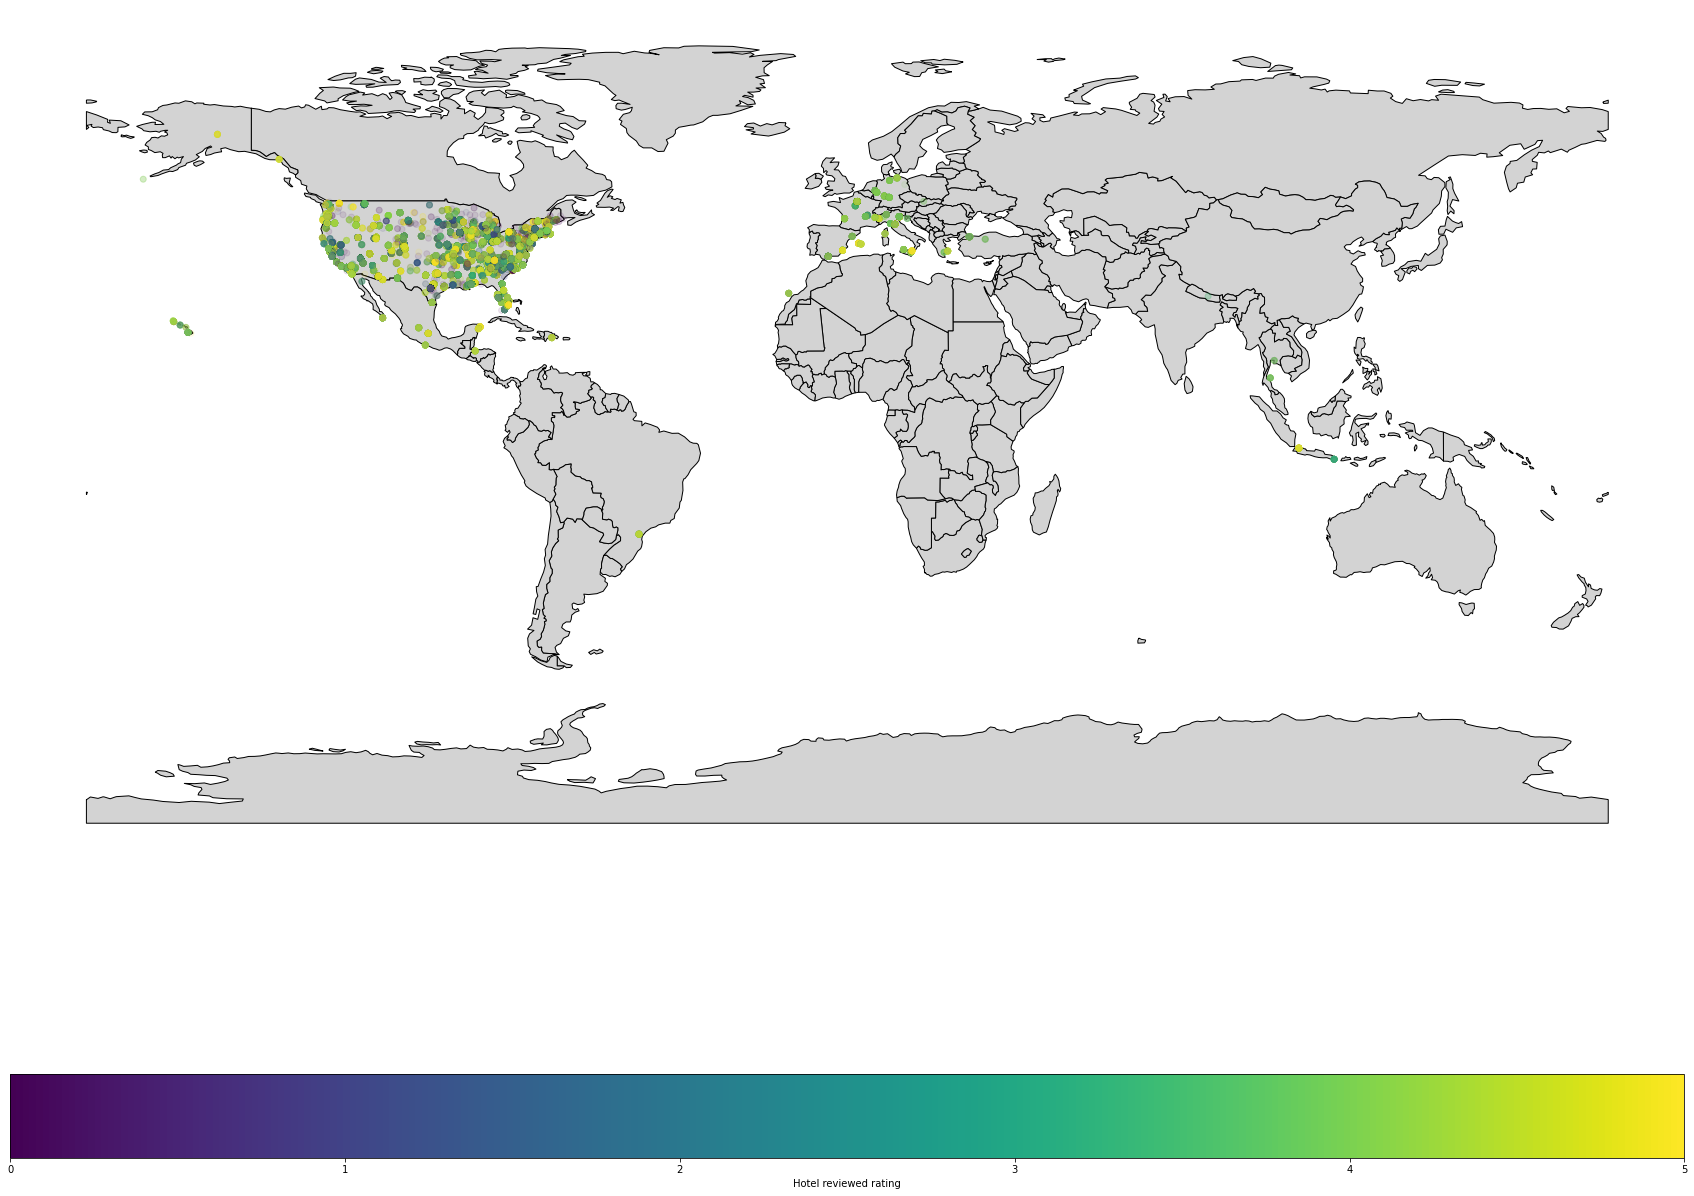

In [ ]:
fig = plt.figure(figsize=(30, 26))
ax= fig.add_subplot(111) 
dataframe_filepath.plot(ax=ax, color='lightgray', edgecolor='black')
geo_df.plot(column='reviews_rating',legend=True,legend_kwds={'label': "Hotel reviewed rating",'orientation': "horizontal"}, ax=ax, alpha=.1)
ax.axis('off')
plt.show()

- if we want to aggragate on 'province' for deeper analytics, we can notice the US's state are not standadised to perform agregation 

In [ ]:
df['province'].value_counts()

CA                              3821
VA                              2620
TX                              1797
FL                              1399
NY                              1228
GA                              1216
PA                              1052
MI                               924
CO                               841
LA                               667
OH                               629
SC                               612
MA                               611
IL                               586
TN                               577
WA                               551
IA                               549
NV                               480
WI                               469
MS                               454
MN                               423
OR                               404
MO                               395
NC                               388
ME                               380
AL                               367
AR                               356
I

- Province's feature US's state standardizied format 

In [ ]:
file_path_us_state = "/content/drive/My Drive/Nlp/Hotel_ reviews/datas/50_us_states_two_letter_abbreviations.csv"
file_path_us_state 

'/content/drive/My Drive/Nlp/Hotel_ reviews/datas/50_us_states_two_letter_abbreviations.csv'

In [ ]:
us_state_df = pd.read_csv(file_path_us_state,sep=',', na_values=' ')
us_state_df.head()

us_state
0       AL
1       AK
2       AZ
3       AR
4       CA

In [ ]:
df=df[df['province'].isin(us_state_df['us_state'])]

- we can observe a mean rate below 2.5, probably we will analyses deeper if can find some reason about them in topics modeling

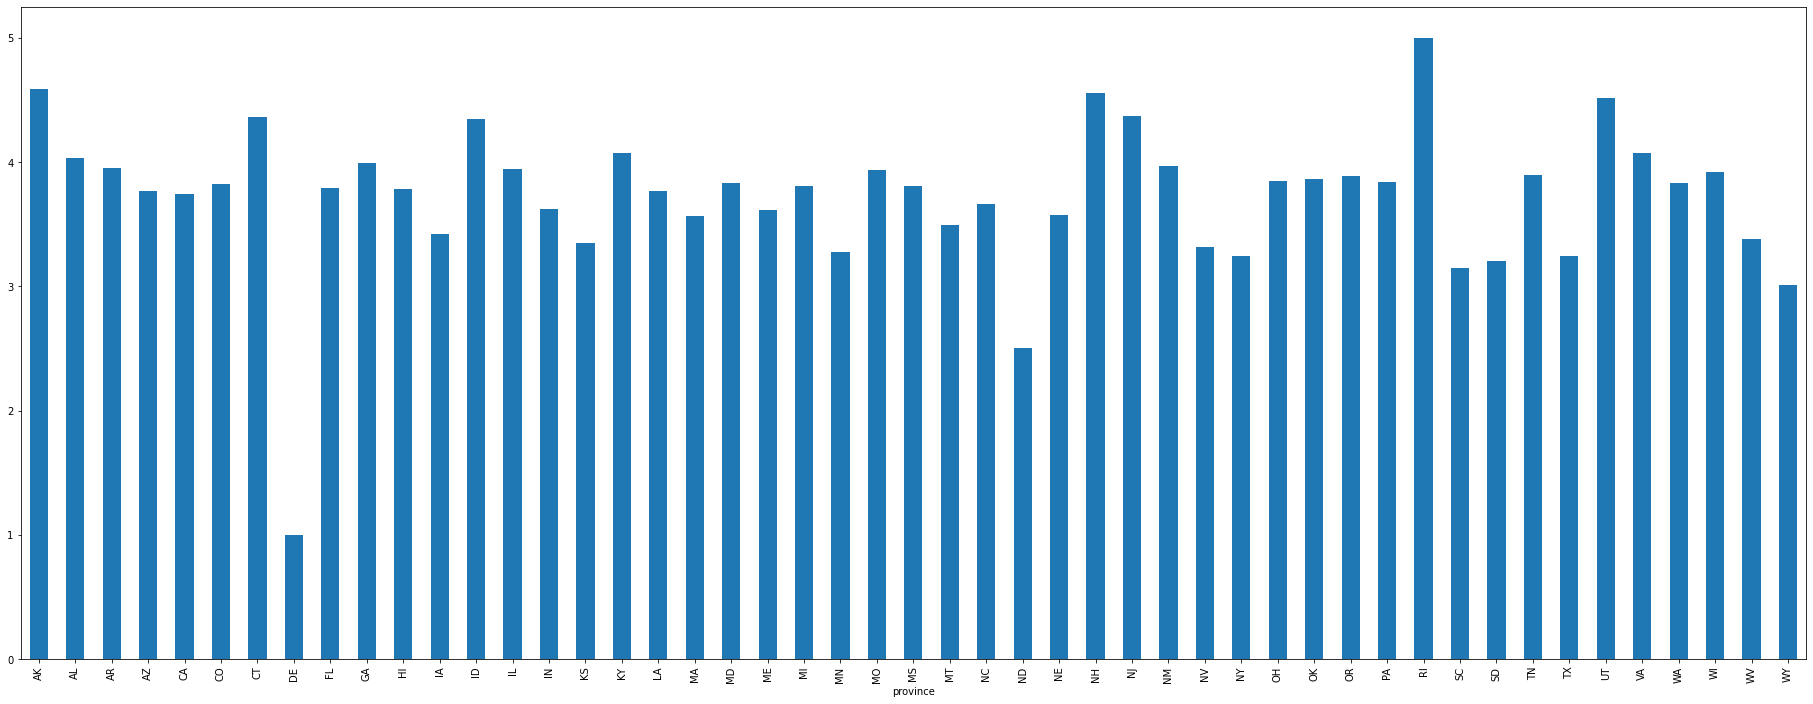

In [ ]:
fig = plt.figure(figsize=(32, 12))
df.groupby('province').reviews_rating.mean().plot.bar()

##3.3 Pre - Processing

In [ ]:
df.head()

address categories      city country   latitude  longitude                name postalCode province          reviews.date     reviews.dateAdded  reviews.doRecommend  reviews.id                                       reviews.text                       reviews.title reviews.userCity reviews.username reviews.userProvince Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25                   geometry  reviews_rating
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Pleasant 10 min walk along the sea front to th...  Good location away from the crouds              NaN      Russ (kent)                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN  POINT (12.37619 45.42161)               4
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Really lovely hotel. Stayed on the very top fl...      Great hotel with Jacuzzi bath!              NaN       A Traveler                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN  POINT (12.37619 45.42161)               5
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Ett mycket bra hotell. Det som drog ner betyge...                         Lugnt l��ge              NaN             Maud                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN  POINT (12.37619 45.42161)               5
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  We stayed here for four nights in October. The...          Good location on the Lido.              NaN            Julie                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN  POINT (12.37619 45.42161)               5
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  We stayed here for four nights in October. The...              ������ ���������������              NaN         sungchul                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN  POINT (12.37619 45.42161)               5

###3.3.1 features engineering

In [ ]:
df['space']= ' '

In [ ]:
df

address                                         categories          city country   latitude  longitude                                           name postalCode province          reviews.date     reviews.dateAdded  reviews.doRecommend  reviews.id                                       reviews.text                       reviews.title reviews.userCity reviews.username reviews.userProvince Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25                    geometry  reviews_rating space
0      Riviera San Nicol 11/a                                             Hotels      Mableton      US  45.421611  12.376187                             Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Pleasant 10 min walk along the sea front to th...  Good location away from the crouds              NaN      Russ (kent)                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   POINT (12.37619 45.42161)               4      
1      Riviera San Nicol 11/a                                             Hotels      Mableton      US  45.421611  12.376187                             Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Really lovely hotel. Stayed on the very top fl...      Great hotel with Jacuzzi bath!              NaN       A Traveler                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   POINT (12.37619 45.42161)               5      
2      Riviera San Nicol 11/a                                             Hotels      Mableton      US  45.421611  12.376187                             Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  Ett mycket bra hotell. Det som drog ner betyge...                         Lugnt l��ge              NaN             Maud                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   POINT (12.37619 45.42161)               5      
3      Riviera San Nicol 11/a                                             Hotels      Mableton      US  45.421611  12.376187                             Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  We stayed here for four nights in October. The...          Good location on the Lido.              NaN            Julie                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   POINT (12.37619 45.42161)               5      
4      Riviera San Nicol 11/a                                             Hotels      Mableton      US  45.421611  12.376187                             Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z  2016-10-24T00:00:25Z                  NaN         NaN  We stayed here for four nights in October. The...              ������ ���������������              NaN         sungchul                  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN   POINT (12.37619 45.42161)               5      
...                       ...                                                ...           ...     ...        ...        ...                                            ...        ...      ...                   ...                   ...                  ...         ...                                                ...                                 ...              ...              ...                  ...         ...         ...         ...         ...         ...         ...         ...                         ...             ...   ...
35907      1088 Powdermill Rd  Cabins,Resorts & Vacation Cottages,Wedding Cha...    Gatlinburg      US  35.754868 -83.457295                             Elk Springs Resort      37738       TN  2012-03-20T00:

In [ ]:
df['reviews_title_text']=df['reviews.title']+df['space']+df['reviews.text']

In [ ]:
nlp_df=df[['name','province','geometry','reviews_rating','reviews_title_text']]

In [ ]:
nlp_df.head()

name province                   geometry  reviews_rating                                 reviews_title_text
0  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               4  Good location away from the crouds Pleasant 10...
1  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Great hotel with Jacuzzi bath! Really lovely h...
2  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Lugnt l��ge Ett mycket bra hotell. Det som dro...
3  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Good location on the Lido. We stayed here for ...
4  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  ������ ��������������� We stayed here for four...

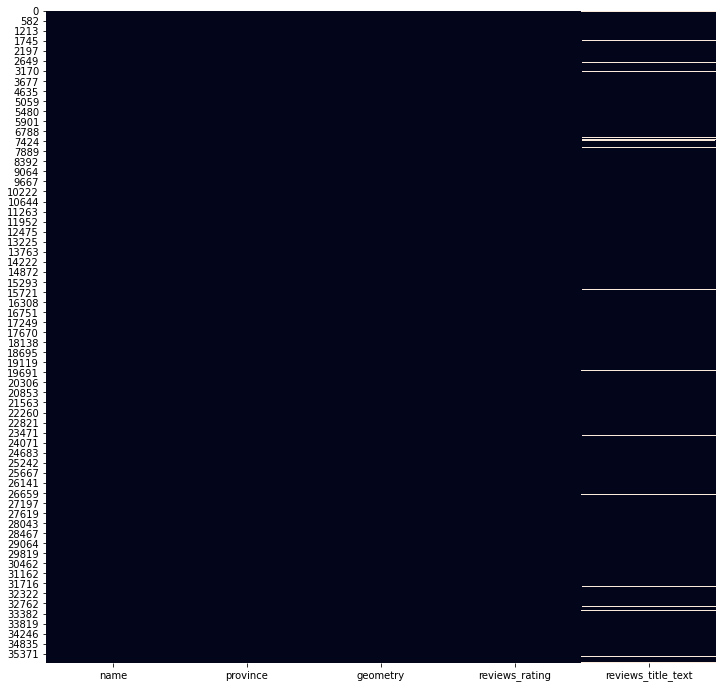

In [ ]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(nlp_df.isna(), cbar=False)

In [ ]:
nlp_df=nlp_df.dropna()

In [ ]:
# dataset's NA values analysis
((nlp_df.isna().sum()/nlp_df.shape[0]).sort_values(ascending=True))*100

name                  0.0
province              0.0
geometry              0.0
reviews_rating        0.0
reviews_title_text    0.0
dtype: float64

In [ ]:
nlp_df

name province                    geometry  reviews_rating                                 reviews_title_text
0      Hotel Russo Palace       GA   POINT (12.37619 45.42161)               4  Good location away from the crouds Pleasant 10...
1      Hotel Russo Palace       GA   POINT (12.37619 45.42161)               5  Great hotel with Jacuzzi bath! Really lovely h...
2      Hotel Russo Palace       GA   POINT (12.37619 45.42161)               5  Lugnt l��ge Ett mycket bra hotell. Det som dro...
3      Hotel Russo Palace       GA   POINT (12.37619 45.42161)               5  Good location on the Lido. We stayed here for ...
4      Hotel Russo Palace       GA   POINT (12.37619 45.42161)               5  ������ ��������������� We stayed here for four...
...                   ...      ...                         ...             ...                                                ...
35905  Elk Springs Resort       TN  POINT (-83.45730 35.75487)               5  We Loved It! We truly enjoyed staying at the E...
35906  Elk Springs Resort       TN  POINT (-83.45730 35.75487)               5  Amazing time (both times!!) We were here for a...
35907  Elk Springs Resort       TN  POINT (-83.45730 35.75487)               5  Amazing time (both times!!) Best of the Best!!...
35908  Elk Springs Resort       TN  POINT (-83.45730 35.75487)               5  Amazing time (both times!!) Amazing Vacation i...
35909  Elk Springs Resort       TN  POINT (-83.45730 35.75487)               5  Amazing time (both times!!) My husband and I s...

[26856 rows x 5 columns]

### TextBlob polarity and subjectivity analytics

In [ ]:
nlp_df['reviews_title_text'][0]

"Good location away from the crouds Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!"

In [ ]:
nlp_df['polarity'] =nlp_df.reviews_title_text.apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
nlp_df['subjectivity'] = nlp_df.reviews_title_text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
nlp_df.head()

name province                   geometry  reviews_rating                                 reviews_title_text  polarity  subjectivity
0  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               4  Good location away from the crouds Pleasant 10...  0.556667      0.653333
1  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Great hotel with Jacuzzi bath! Really lovely h...  0.681250      0.725000
2  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Lugnt l��ge Ett mycket bra hotell. Det som dro...  0.350000      0.550000
3  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Good location on the Lido. We stayed here for ...  0.360185      0.622222
4  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  ������ ��������������� We stayed here for four...  0.317708      0.625000

In [ ]:
for i in range(0, 5):
  count_positive_polarity = len(nlp_df[(nlp_df["reviews_rating"] == i) & (nlp_df['polarity'] > 0)])
  count_negative_polarity = len(nlp_df[(nlp_df['reviews_rating'] == i) & (nlp_df['polarity'] < 0)])

  print(f' for reviews rate {i} positive polarity count:{count_positive_polarity} ')
  print(f' for reviews rate {i} negative polarity count:{count_negative_polarity} ')
  print('------------------------------------------\n')


 for reviews rate 0 positive polarity count:32 
 for reviews rate 0 negative polarity count:3 
------------------------------------------

 for reviews rate 1 positive polarity count:783 
 for reviews rate 1 negative polarity count:1431 
------------------------------------------

 for reviews rate 2 positive polarity count:1309 
 for reviews rate 2 negative polarity count:829 
------------------------------------------

 for reviews rate 3 positive polarity count:3573 
 for reviews rate 3 negative polarity count:620 
------------------------------------------

 for reviews rate 4 positive polarity count:7026 
 for reviews rate 4 negative polarity count:315 
------------------------------------------



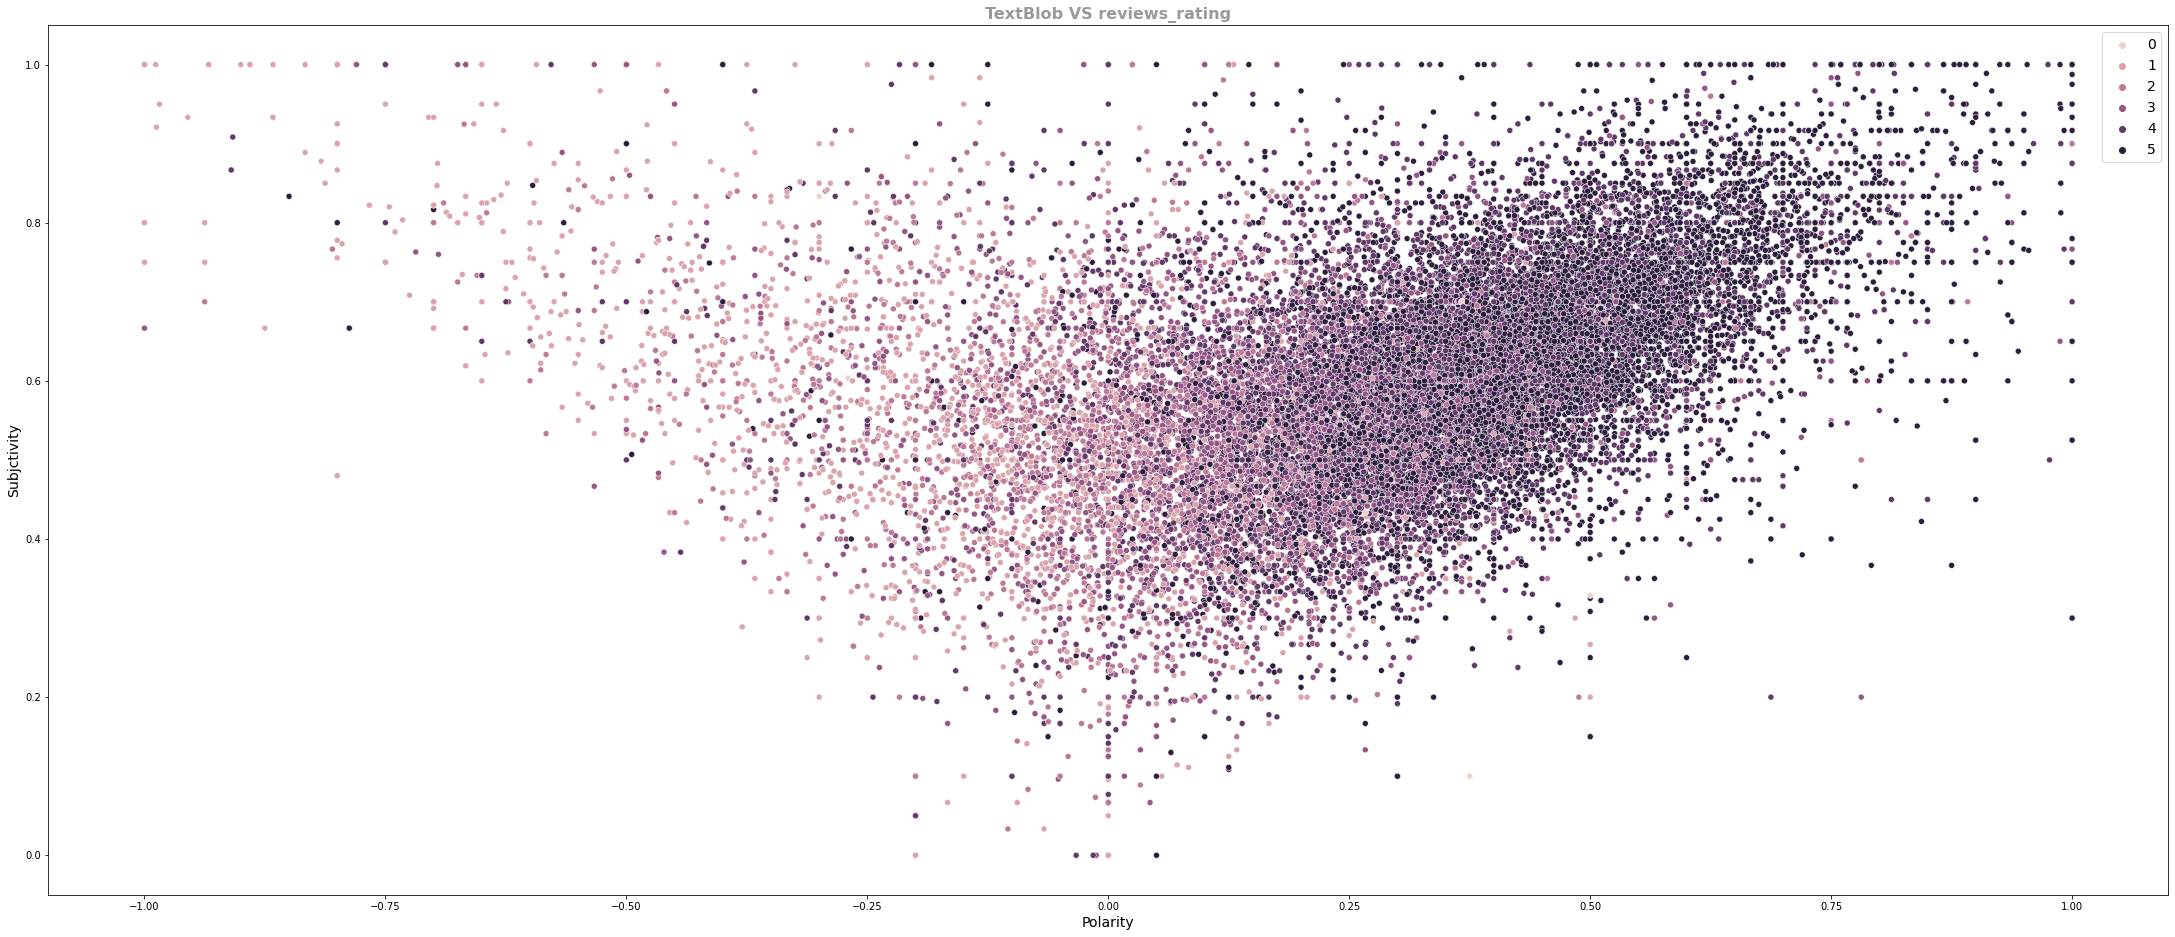

In [ ]:
plt.figure(figsize=(38,16))

sns.scatterplot(nlp_df['polarity'], nlp_df['subjectivity'], hue=nlp_df["reviews_rating"])

plt.title('TextBlob VS reviews_rating', fontweight='bold', color = 'black', fontsize='16', alpha=0.4)
plt.xlabel('Polarity', fontsize='14')
plt.ylabel('Subjctivity', fontsize='14')
plt.legend(fontsize=14)

plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:


lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words("english")

def text_preprocess(text):
    text = text.lower()
    #after checking vocab_out dict we decided to aply those following replace
    text = text.replace("-", " ").replace("/", " ").replace("\\", " ").replace("'", " ").replace("素晴らしいサービス", " ").replace("ジャカルタの中心地", " ")
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

In [ ]:
nlp_df["tokens"] = nlp_df["reviews_title_text"].apply(lambda x: text_preprocess(x))

In [ ]:
nlp_df.head()

name province                   geometry  reviews_rating                                 reviews_title_text  polarity  subjectivity                                             tokens
0  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               4  Good location away from the crouds Pleasant 10...  0.556667      0.653333  [good, location, away, crouds, pleasant, min, ...
1  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Great hotel with Jacuzzi bath! Really lovely h...  0.681250      0.725000  [great, hotel, jacuzzi, bath, really, lovely, ...
2  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Lugnt l��ge Ett mycket bra hotell. Det som dro...  0.350000      0.550000  [lugnt, ett, mycket, bra, hotell, det, som, dr...
3  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Good location on the Lido. We stayed here for ...  0.360185      0.622222  [good, location, lido, stayed, four, night, oc...
4  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  ������ ��������������� We stayed here for four...  0.317708      0.625000  [stayed, four, night, october, hotel, staff, w...

In [ ]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r') as f:
        words = []
        word_to_vec_map = {}
        bad = 0
        
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.append(curr_word)
            try :
                word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            except ValueError:
                bad +=1
            
        print(f'There are {bad} bad lines')
    return words, word_to_vec_map

In [ ]:
words, word_to_vec_map = read_glove_vecs("/content/drive/My Drive/datas/glove.6B.300d.txt")

There are 0 bad lines


In [ ]:


def is_in_vocab(tokens_list):
    in_vocab = {}
    out_vocab = {}
    for tokens in tokens_list:
        for w in tokens:
            if w.lower() in words:
                in_vocab[w] = 1
            elif w in out_vocab.keys():
                out_vocab[w] += 1
            else:
                out_vocab[w] = 1
    out_vocab_ordered = sorted(out_vocab.items(), key=operator.itemgetter(1))[::-1]
    return in_vocab, out_vocab_ordered

In [ ]:
text = np.array(nlp_df['tokens'])

In [ ]:
in_vocab, out_vocab = is_in_vocab(text)

In [ ]:
in_vocab_ratio = len(in_vocab.keys())/(len(in_vocab.keys()) + len(out_vocab))
out_vocab_ratio = len(out_vocab)/(len(in_vocab.keys()) + len(out_vocab))

In [ ]:
print("proportion of words in word embedding vocab: ", in_vocab_ratio*100, "%")
print("proportion of words not in word embedding vocab: ", out_vocab_ratio*100, "%")

proportion of words in word embedding vocab:  67.34089787863839 %
proportion of words not in word embedding vocab:  32.65910212136161 %


In [ ]:
def get_vector_from(tokens):
    word_vect = np.array([word_to_vec_map[t] for t in tokens if t in words])
    try:
        word_vect = word_vect.mean(axis=0).astype("float64")
    except:
        print("Can not convert tokens into vector")
    return word_vect

In [ ]:
nlp_df["vector"] = nlp_df["tokens"].apply(lambda x: get_vector_from(x))

In [ ]:
nlp_df .head()

name province                   geometry  reviews_rating                                 reviews_title_text  polarity  subjectivity                                             tokens                                             vector
0  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               4  Good location away from the crouds Pleasant 10...  0.556667      0.653333  [good, location, away, crouds, pleasant, min, ...  [-0.09194858333333332, 0.002034079166666629, 0...
1  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Great hotel with Jacuzzi bath! Really lovely h...  0.681250      0.725000  [great, hotel, jacuzzi, bath, really, lovely, ...  [0.006320892857142865, 0.10249496428571427, 0....
2  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Lugnt l��ge Ett mycket bra hotell. Det som dro...  0.350000      0.550000  [lugnt, ett, mycket, bra, hotell, det, som, dr...  [0.36433556250000004, -0.07781325, 0.053203062...
3  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  Good location on the Lido. We stayed here for ...  0.360185      0.622222  [good, location, lido, stayed, four, night, oc...  [-0.15596248571428575, 0.04364550857142857, -0...
4  Hotel Russo Palace       GA  POINT (12.37619 45.42161)               5  ������ ��������������� We stayed here for four...  0.317708      0.625000  [stayed, four, night, october, hotel, staff, w...  [-0.15533678125, 0.05974146250000001, -0.00012...

In [ ]:
X = nlp_df['vector'].apply(lambda x : pd.Series(x))
X = X.set_index(nlp_df.index)
X.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98   \
0 -0.091949  0.002034  0.003618 -0.109243 -0.112242  0.045258  0.009656  0.061584  0.104548 -1.189970  0.089103 -0.146474 -0.086531  0.191075 -0.001073  0.005187 -0.128374  0.005244  0.074510  0.097430 -0.123386  0.168617  0.086543  0.035925 -0.147384 -0.059714  0.020944 -0.003582 -0.083976  0.070611  0.115277  0.157789 -0.230585  0.028592 -0.638411  0.211882 -0.124075 -0.025935 -0.202799 -0.151909 -0.126026 -0.106816 -0.076043  0.073366  0.032087  0.159588  0.452416  0.168145 -0.019691  0.018856 -0.058254 -0.143297  0.120883 -0.218351 -0.021895  0.179086 -0.011005  0.030827  0.045818  0.154723  0.143264 -0.003568  0.258832  0.099622 -0.029283 -0.191823  0.099302  0.011048 -0.096066 -0.042965 -0.078794 -0.050261  0.016632  0.032055 -0.136968  0.002181  0.108140  0.082807  0.052088 -0.258119 -0.149252  0.095056  0.059029  0.028116  0.033461 -0.078630 -0.145672 -0.015735  0.048507 -0.020264  0.036209  0.148406  0.052233 -0.052668  0.051600  0.041413  0.099275 -0.189471  0.082344   
1  0.006321  0.102495  0.032989 -0.120911  0.081827  0.105946  0.014754  0.022179  0.039123 -1.067540  0.076983 -0.195846  0.041188  0.225434 -0.107801  0.000886 -0.045820 -0.061274 -0.027956  0.140723 -0.030979  0.237939  0.073539  0.030158 -0.118826 -0.157628 -0.039647  0.008024  0.096730 -0.003647 -0.024110  0.170966 -0.312491  0.020938 -0.836565  0.240523  0.063626  0.079320 -0.028964 -0.177849 -0.071592 -0.210847 -0.023888  0.192926  0.027464  0.113002  0.421353  0.111757  0.017179 -0.047446  0.045145 -0.248345 -0.000681 -0.058556 -0.108955  0.252573  0.019931  0.235602  0.082163  0.088318  0.324338 -0.074058  0.124786  0.199969 -0.040564 -0.288435  0.102203 -0.034051 -0.286661 -0.042285 -0.005668 -0.022231  0.019613  0.105032 -0.127558 -0.037934  0.028652  0.043793 -0.158512 -0.235755 -0.080091  0.118887  0.087334 -0.059637  0.178764  0.062103 -0.053622 -0.005283  0.020780 -0.061424 -0.001568  0.176379 -0.051074 -0.006743  0.032362  0.016781 -0.009112 -0.197733  0.126696   
2  0.364336 -0.077813  0.053203  0.096751 -0.057661 -0.063428  0.094078  0.131847 -0.138611 -0.285329  0.072166  0.010498 -0.218013 -0.047401  0.100127  0.092869 -0.121099  0.197315  0.166003  0.178188 -0.125554 -0.249941 -0.034285  0.142929  0.107561  0.063896 -0.094824 -0.059083  0.282104 -0.042728  0.260440  0.056458  0.099163  0.285041  0.134100 -0.070493  0.205851  0.022970 -0.009859  0.032180  0.050989 -0.147238 -0.081713  0.056511  0.020346 -0.123390  0.290042 -0.108116 -0.107468  0.130631 -0.079814  0.193667  0.037586 -0.103165 -0.094488  0.193964 -0.218753 -0.087845  0.289825 -0.040949  0.033006  0.278436 -0.257422  0.218399 -0.262064  0.103304  0.055460  0.058907  0.134315 -0.103938 -0.110755  0.007027 -0.086462  0.136903 -0.046372 -0.007270  0.217584 -0.473148  0.098896 -0.189537  0.123123 -0.040785  0.372066 -0.225577  0.288686  0.057746 -0.323420 -0.107333  0.098036  0.020691 -0.118610 -0.132179  0.105298 -0.215422  0.136346  0.013243  0.212526 -0.038802  0.035855   
3 -0.155962  0.043646 -0.007

In [ ]:
nlp_new_df=pd.concat([X, nlp_df['reviews_rating']], axis=1)
nlp_new_df.head()

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98  \
0 -0.091949  0.002034  0.003618 -0.109243 -0.112242  0.045258  0.009656  0.061584  0.104548 -1.189970  0.089103 -0.146474 -0.086531  0.191075 -0.001073  0.005187 -0.128374  0.005244  0.074510  0.097430 -0.123386  0.168617  0.086543  0.035925 -0.147384 -0.059714  0.020944 -0.003582 -0.083976  0.070611  0.115277  0.157789 -0.230585  0.028592 -0.638411  0.211882 -0.124075 -0.025935 -0.202799 -0.151909 -0.126026 -0.106816 -0.076043  0.073366  0.032087  0.159588  0.452416  0.168145 -0.019691  0.018856 -0.058254 -0.143297  0.120883 -0.218351 -0.021895  0.179086 -0.011005  0.030827  0.045818  0.154723  0.143264 -0.003568  0.258832  0.099622 -0.029283 -0.191823  0.099302  0.011048 -0.096066 -0.042965 -0.078794 -0.050261  0.016632  0.032055 -0.136968  0.002181  0.108140  0.082807  0.052088 -0.258119 -0.149252  0.095056  0.059029  0.028116  0.033461 -0.078630 -0.145672 -0.015735  0.048507 -0.020264  0.036209  0.148406  0.052233 -0.052668  0.051600  0.041413  0.099275 -0.189471  0.082344   
1  0.006321  0.102495  0.032989 -0.120911  0.081827  0.105946  0.014754  0.022179  0.039123 -1.067540  0.076983 -0.195846  0.041188  0.225434 -0.107801  0.000886 -0.045820 -0.061274 -0.027956  0.140723 -0.030979  0.237939  0.073539  0.030158 -0.118826 -0.157628 -0.039647  0.008024  0.096730 -0.003647 -0.024110  0.170966 -0.312491  0.020938 -0.836565  0.240523  0.063626  0.079320 -0.028964 -0.177849 -0.071592 -0.210847 -0.023888  0.192926  0.027464  0.113002  0.421353  0.111757  0.017179 -0.047446  0.045145 -0.248345 -0.000681 -0.058556 -0.108955  0.252573  0.019931  0.235602  0.082163  0.088318  0.324338 -0.074058  0.124786  0.199969 -0.040564 -0.288435  0.102203 -0.034051 -0.286661 -0.042285 -0.005668 -0.022231  0.019613  0.105032 -0.127558 -0.037934  0.028652  0.043793 -0.158512 -0.235755 -0.080091  0.118887  0.087334 -0.059637  0.178764  0.062103 -0.053622 -0.005283  0.020780 -0.061424 -0.001568  0.176379 -0.051074 -0.006743  0.032362  0.016781 -0.009112 -0.197733  0.126696   
2  0.364336 -0.077813  0.053203  0.096751 -0.057661 -0.063428  0.094078  0.131847 -0.138611 -0.285329  0.072166  0.010498 -0.218013 -0.047401  0.100127  0.092869 -0.121099  0.197315  0.166003  0.178188 -0.125554 -0.249941 -0.034285  0.142929  0.107561  0.063896 -0.094824 -0.059083  0.282104 -0.042728  0.260440  0.056458  0.099163  0.285041  0.134100 -0.070493  0.205851  0.022970 -0.009859  0.032180  0.050989 -0.147238 -0.081713  0.056511  0.020346 -0.123390  0.290042 -0.108116 -0.107468  0.130631 -0.079814  0.193667  0.037586 -0.103165 -0.094488  0.193964 -0.218753 -0.087845  0.289825 -0.040949  0.033006  0.278436 -0.257422  0.218399 -0.262064  0.103304  0.055460  0.058907  0.134315 -0.103938 -0.110755  0.007027 -0.086462  0.136903 -0.046372 -0.007270  0.217584 -0.473148  0.098896 -0.189537  0.123123 -0.040785  0.372066 -0.225577  0.288686  0.057746 -0.323420 -0.107333  0.098036  0.020691 -0.118610 -0.132179  0.105298 -0.215422  0.136346  0.013243  0.212526 -0.038802  0.035855   
3 -0.155962  0.043646 -0.00765

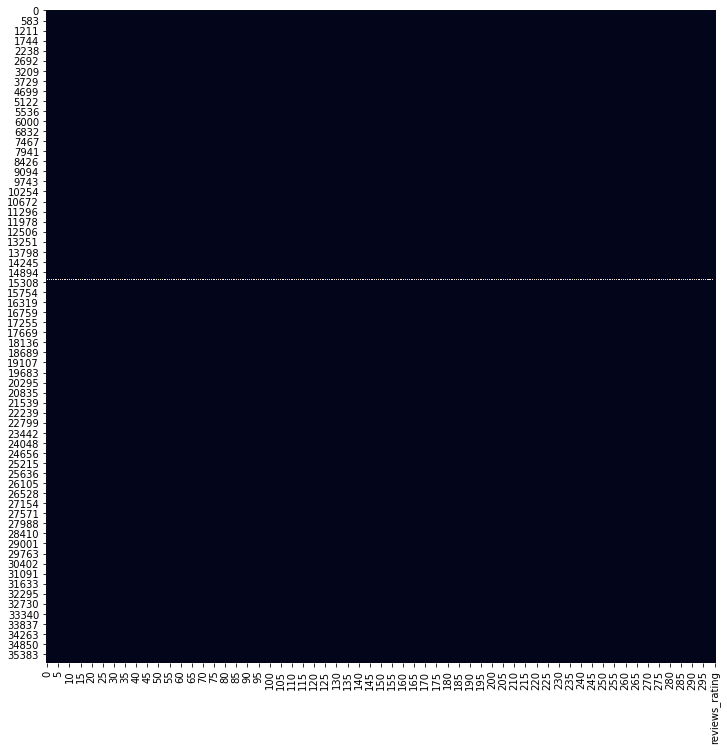

In [ ]:
# dataset's NA values analysis
plt.figure(figsize=(12,12))
sns.heatmap(nlp_new_df.isna(), cbar=False)

In [ ]:
nlp_new_df = nlp_new_df.dropna()

In [ ]:
y = nlp_new_df['reviews_rating']
X = nlp_new_df.drop('reviews_rating', axis=1)

In [ ]:
X.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98   \
0 -0.091949  0.002034  0.003618 -0.109243 -0.112242  0.045258  0.009656  0.061584  0.104548 -1.189970  0.089103 -0.146474 -0.086531  0.191075 -0.001073  0.005187 -0.128374  0.005244  0.074510  0.097430 -0.123386  0.168617  0.086543  0.035925 -0.147384 -0.059714  0.020944 -0.003582 -0.083976  0.070611  0.115277  0.157789 -0.230585  0.028592 -0.638411  0.211882 -0.124075 -0.025935 -0.202799 -0.151909 -0.126026 -0.106816 -0.076043  0.073366  0.032087  0.159588  0.452416  0.168145 -0.019691  0.018856 -0.058254 -0.143297  0.120883 -0.218351 -0.021895  0.179086 -0.011005  0.030827  0.045818  0.154723  0.143264 -0.003568  0.258832  0.099622 -0.029283 -0.191823  0.099302  0.011048 -0.096066 -0.042965 -0.078794 -0.050261  0.016632  0.032055 -0.136968  0.002181  0.108140  0.082807  0.052088 -0.258119 -0.149252  0.095056  0.059029  0.028116  0.033461 -0.078630 -0.145672 -0.015735  0.048507 -0.020264  0.036209  0.148406  0.052233 -0.052668  0.051600  0.041413  0.099275 -0.189471  0.082344   
1  0.006321  0.102495  0.032989 -0.120911  0.081827  0.105946  0.014754  0.022179  0.039123 -1.067540  0.076983 -0.195846  0.041188  0.225434 -0.107801  0.000886 -0.045820 -0.061274 -0.027956  0.140723 -0.030979  0.237939  0.073539  0.030158 -0.118826 -0.157628 -0.039647  0.008024  0.096730 -0.003647 -0.024110  0.170966 -0.312491  0.020938 -0.836565  0.240523  0.063626  0.079320 -0.028964 -0.177849 -0.071592 -0.210847 -0.023888  0.192926  0.027464  0.113002  0.421353  0.111757  0.017179 -0.047446  0.045145 -0.248345 -0.000681 -0.058556 -0.108955  0.252573  0.019931  0.235602  0.082163  0.088318  0.324338 -0.074058  0.124786  0.199969 -0.040564 -0.288435  0.102203 -0.034051 -0.286661 -0.042285 -0.005668 -0.022231  0.019613  0.105032 -0.127558 -0.037934  0.028652  0.043793 -0.158512 -0.235755 -0.080091  0.118887  0.087334 -0.059637  0.178764  0.062103 -0.053622 -0.005283  0.020780 -0.061424 -0.001568  0.176379 -0.051074 -0.006743  0.032362  0.016781 -0.009112 -0.197733  0.126696   
2  0.364336 -0.077813  0.053203  0.096751 -0.057661 -0.063428  0.094078  0.131847 -0.138611 -0.285329  0.072166  0.010498 -0.218013 -0.047401  0.100127  0.092869 -0.121099  0.197315  0.166003  0.178188 -0.125554 -0.249941 -0.034285  0.142929  0.107561  0.063896 -0.094824 -0.059083  0.282104 -0.042728  0.260440  0.056458  0.099163  0.285041  0.134100 -0.070493  0.205851  0.022970 -0.009859  0.032180  0.050989 -0.147238 -0.081713  0.056511  0.020346 -0.123390  0.290042 -0.108116 -0.107468  0.130631 -0.079814  0.193667  0.037586 -0.103165 -0.094488  0.193964 -0.218753 -0.087845  0.289825 -0.040949  0.033006  0.278436 -0.257422  0.218399 -0.262064  0.103304  0.055460  0.058907  0.134315 -0.103938 -0.110755  0.007027 -0.086462  0.136903 -0.046372 -0.007270  0.217584 -0.473148  0.098896 -0.189537  0.123123 -0.040785  0.372066 -0.225577  0.288686  0.057746 -0.323420 -0.107333  0.098036  0.020691 -0.118610 -0.132179  0.105298 -0.215422  0.136346  0.013243  0.212526 -0.038802  0.035855   
3 -0.155962  0.043646 -0.007

In [ ]:
y.to_frame().head()

reviews_rating
0               4
1               5
2               5
3               5
4               5

#4.NLP Sentiment analysis modelisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98   \
8913  -0.038283  0.104781 -0.096698 -0.296982 -0.088360 -0.058072  0.025014  0.040812  0.012716 -1.079781  0.002287 -0.029347 -0.078243 -0.009372 -0.031872  0.121814 -0.068541  0.055720 -0.068039 -0.061312  0.026611  0.102176  0.029387  0.079917 -0.129465 -0.162885  0.132430 -0.167769  0.137472 -0.012730  0.029460  0.008434 -0.159737  0.054175 -0.650864  0.122644 -0.215223 -0.126637 -0.098546 -0.064310 -0.181517 -0.150263 -0.121000  0.015300  0.147674  0.022638  0.279890 -0.001432 -0.076278  0.001867  0.067467 -0.144713  0.005397 -0.170391 -0.063097 -0.073962 -0.021524 -0.044926  0.115777 -0.023571  0.129238  0.027740  0.189687  0.171151 -0.065082 -0.323277  0.082691 -0.075837 -0.001803 -0.063469 -0.109373 -0.056179 -0.034878  0.082554 -0.024775 -0.000157  0.123803  0.005061  0.080277 -0.246212  0.009636  0.005482  0.035478  0.077016 -0.068730  0.012009 -0.134265  0.050916 -0.114465 -0.013781 -0.091360 -0.066720 -0.089856  0.033787  0.033771 -0.010108 -0.030106 -0.176528  0.217510   
33844 -0.048533 -0.031184  0.027738 -0.139132  0.014866 -0.119152 -0.037185 -0.015811 -0.018552 -1.201192  0.085393 -0.116978  0.007435 -0.033003 -0.028442  0.116439  0.173958 -0.054346 -0.020254  0.001728 -0.078863  0.095779  0.069581 -0.002818 -0.157373 -0.046096  0.044534 -0.017651 -0.051079 -0.140167  0.058275  0.132686 -0.111794  0.075338 -0.817570  0.142191 -0.176954  0.091997 -0.110250 -0.113373 -0.153187 -0.030722  0.015412  0.160441 -0.024226  0.136072  0.292250  0.216070 -0.106982  0.001000  0.079900 -0.201882  0.052586 -0.004466 -0.127845  0.219913  0.096235  0.071227  0.112354 -0.037124  0.015333 -0.058227  0.216508  0.109224 -0.115256 -0.255441  0.077273 -0.076997 -0.105912 -0.074794 -0.027720 -0.095756  0.018846  0.069372 -0.089193 -0.017173  0.016758  0.070065  0.041324 -0.060464 -0.159040  0.137264  0.172732  0.117702 -0.077440 -0.092866 -0.025606  0.004831 -0.013792  0.020189 -0.048232  0.194553 -0.202237 -0.022276  0.095304 -0.050252 -0.112612 -0.147403  0.000301   
16794 -0.111074  0.072350 -0.059173 -0.101989 -0.038905  0.057694  0.034321 -0.012045  0.002077 -1.034252  0.057004 -0.087362  0.066000  0.091834 -0.054619  0.033985 -0.117460 -0.069061  0.060126 -0.060538  0.038273  0.230111  0.081461  0.134339 -0.125543 -0.011889  0.084144 -0.045446  0.064176 -0.013200  0.023510  0.217496 -0.249127  0.023670 -0.704035  0.295465 -0.147920 -0.080973 -0.141494 -0.128435 -0.083876 -0.032809 -0.079514  0.035609  0.035440  0.186218  0.275641 -0.007765 -0.052642  0.027619  0.050516 -0.137944  0.160938  0.023423 -0.039375  0.122797 -0.070520  0.082745  0.169538  0.049709  0.211505 -0.091548  0.140934  0.126390  0.027312 -0.194100  0.140819 -0.005747 -0.003415  0.072157 -0.083375 -0.027535  0.013776  0.124129  0.024803  0.004047  0.083189  0.125216 -0.016475 -0.188082 -0.075329  0.164119  0.017374 -0.097950  0.100587 -0.012880 -0.086744 -0.028231 -0.016393 -0.034145 -0.031157  0.189230 -0.134320 -0.054379  0.022445 -0.048529  0.027856 -0.079308  0.082773   
10521 -0.102167 

In [ ]:
model_0 = LinearSVC (random_state=0)

In [ ]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    class_names = [0,1, 2, 3, 4, 5]
    
    plt.figure(figsize=(20,20))
    ax1=plt.subplot(211)
    ax1=plot_confusion_matrix(model, X_test, y_test, display_labels=class_names,cmap=plt.cm.Blues,normalize=None, ax=ax1)
    plt.legend()
    plt.show()
    
    #print(classification_report(y_test, y_pred))
    print("linear SVC accuracy_score:",accuracy_score(y_test, y_pred))
    print("linear SVC mean_squared_error:",np.sqrt(mean_squared_error(y_test, y_pred)))
   
    #N, train_score, val_score = learning_curve(model, X_train, y_train, cv= 4,scoring= 'accuracy',
             #                                  train_sizes=np.linspace(0.1, 1, 10))
    #plt.figure(figsize=(12,8))
    #plt.plot(N, train_score.mean(axis=1), label= 'train score')
    #plt.plot(N, val_score.mean(axis=1), label= 'validation score')
    #plt.legend()

No handles with labels found to put in legend.


[[   9    0    0    0    0    0]
 [   0  323   22   48   42   38]
 [   0  124   42  119  104   65]
 [   0   91   30  187  352  231]
 [   0   36    7   99  660  757]
 [   0   25    3   40  340 1566]]


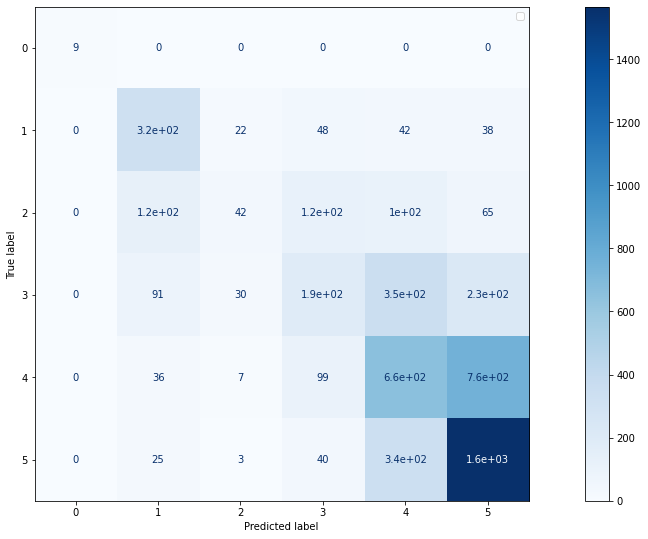

linear SVC accuracy_score: 0.5199626865671642
linear SVC mean_squared_error: 1.0797491416783918


In [ ]:
evaluation(model_0)

#5.NLP topics modelisation

##5.1 Topic modeling's analitical stategy:
- topics modeling on US state wisch has the worst mean rate "DE"
- topics modeling on one the best US state mean rate like "NY"
  - split that state in "good_rate" and "bad_rate"  

In [ ]:
def corpus(df):
  corpus = df['tokens']
  id2word = Dictionary(corpus)
  bow = [id2word.doc2bow(line) for line in corpus]
  tfidf_model = TfidfModel(bow)
  tf_idf_gensim = tfidf_model[bow]
  
  return bow, id2word, tf_idf_gensim

In [ ]:
def topic_modeling(tf_idf_gensim, id2word): 
  print("Latent Semantic Analysis (LSA) or Latent Semantic Indexing (LSI):")
  lsi = LsiModel(tf_idf_gensim, id2word=id2word, num_topics=10)
  pprint(lsi.print_topics())
  print('------------------------------------------------------\n')
  print("Latent Dirichlet Allocation (LDA):")
  lda1 = LdaModel(corpus=tf_idf_gensim, num_topics=10, id2word=id2word, passes=100)
  pprint(lda1.print_topics())
  print('------------------------------------------------------\n')
  print("Hierachical Dirichlet Process (LDA):")
  hdp = HdpModel(corpus=tf_idf_gensim,id2word=id2word)
  pprint(hdp.print_topics(num_topics=10))
  return lsi,lda1, hdp

In [ ]:
def topics(lsi, hdp,lda):
  lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi.show_topics(formatted=False)]
  hdp_topics = [[word for word, prob in topic] for topicid, topic in hdp.show_topics(formatted=False)]
  lda_topics = [[word for word, prob in topic] for topicid, topic in lda.show_topics(formatted=False)]
  return lsi_topics, hdp_topics, lda_topics

In [ ]:
def coherence(lsi_topics, hdp_topics, lda_topics, texts, dictionary):
  lsi_coherence = CoherenceModel(topics=lsi_topics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
  hdp_coherence = CoherenceModel(topics=hdp_topics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
  lda_coherence = CoherenceModel(topics=lda_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()
  return lsi_coherence,hdp_coherence,lda_coherence

In [ ]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')



##5.2 "DE" state topics modeling and visualisation

In [ ]:
nlp_df_DE=nlp_df[nlp_df['province']== 'DE']
nlp_df_DE.head()

name province                    geometry  reviews_rating                                 reviews_title_text  polarity  subjectivity                                             tokens                                             vector
29655  Knights Inn New Castle/wilmington       DE  POINT (-75.55117 39.69849)               1  Worst place ever. Stay Away We had to walk thr... -0.001667      0.510000  [worst, place, ever, stay, away, walk, facilit...  [-0.14643166666666665, 0.16964210000000005, -0...
29656  Knights Inn New Castle/wilmington       DE  POINT (-75.55117 39.69849)               1  BUGS and horrible service! My 11-hour stay in ...  0.156250      0.525000  [bug, horrible, service, hour, stay, hotel, le...  [-0.06901123833333331, 0.07826770000000001, -0...
29657  Knights Inn New Castle/wilmington       DE  POINT (-75.55117 39.69849)               1  what a hell hole i'mm not as kind as randy was... -0.101587      0.561905  [hell, hole, mm, kind, randy, place, plain, en...  [-0.06401321428571428, 0.016758869285714278, -...

In [ ]:
nlp_df_DE['tokens']

29655    [worst, place, ever, stay, away, walk, facilit...
29656    [bug, horrible, service, hour, stay, hotel, le...
29657    [hell, hole, mm, kind, randy, place, plain, en...
Name: tokens, dtype: object

- Implimation of diffrent topics modeling models

In [ ]:
bow_DE,id2word_DE, tf_idf_gensim_DE =corpus(nlp_df_DE)

In [ ]:
lsi_DE,lda_DE, hdp_DE=topic_modeling(tf_idf_gensim_DE, id2word_DE)

Latent Semantic Analysis (LSA) or Latent Semantic Indexing (LSI):
[(0,
  '0.259*"clean" + 0.259*"worth" + 0.241*"english" + 0.188*"place" + '
  '0.140*"room" + 0.130*"broken" + 0.130*"employee" + 0.130*"drawer" + '
  '0.130*"mold" + 0.130*"worst"'),
 (1,
  '-0.329*"like" + -0.329*"hotel" + -0.164*"amount" + -0.164*"experience" + '
  '-0.164*"cheap" + -0.164*"consider" + -0.164*"end" + -0.164*"go" + '
  '-0.164*"horrible" + -0.164*"movie"'),
 (2,
  '-0.266*"clean" + -0.266*"worth" + 0.247*"english" + -0.133*"bathroom" + '
  '-0.133*"broken" + -0.133*"yellow" + -0.133*"find" + -0.133*"employee" + '
  '-0.133*"mold" + -0.133*"pillowcase"')]
------------------------------------------------------

Latent Dirichlet Allocation (LDA):
[(0,
  '0.013*"stay" + 0.013*"ever" + 0.013*"room" + 0.013*"place" + 0.013*"apart" '
  '+ 0.013*"would" + 0.013*"cold" + 0.013*"behind" + 0.013*"attitude" + '
  '0.013*"arrogant"'),
 (1,
  '0.013*"stay" + 0.013*"ever" + 0.013*"room" + 0.013*"place" + 0.013*"apart

- Evaluation of those differents models

In [ ]:
lsi_topics_DE, hdp_topics_DE,lda_topics_DE=topics(lsi_DE,hdp_DE,lda_DE)

In [ ]:
lsi_coherence_DE,hdp_coherence_DE,lda_coherence_DE =coherence(lsi_topics_DE, hdp_topics_DE,lda_topics_DE, nlp_df_DE['tokens'], id2word_DE) 

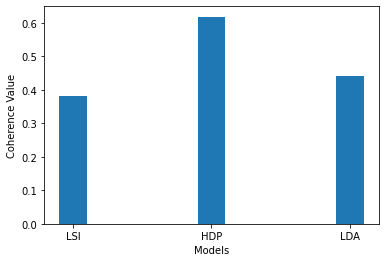

In [ ]:
evaluate_bar_graph([lsi_coherence_DE,hdp_coherence_DE,lda_coherence_DE],
                   ['LSI', 'HDP', 'LDA'])

- Topics modeling visualisation

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=hdp_DE, corpus=bow_DE, dictionary=id2word_DE)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0     -0.030383 -0.002150       1        1  1.948971e+01
21    -0.039214 -0.004519       2        1  1.940950e+01
85     0.046479  0.006678       3        1  1.448978e+01
32    -0.045619 -0.000524       4        1  1.189361e+01
141    0.015305 -0.024825       5        1  1.092464e+01
4      0.015489  0.013649       6        1  1.088356e+01
2      0.000555  0.038427       7        1  6.545594e+00
1      0.011385  0.006569       8        1  5.869289e+00
3      0.069069  0.069670       9        1  2.616770e-01
5     -0.006738 -0.049479      10        1  9.354292e-02
6     -0.056511 -0.000374      11        1  5.609430e-02
7      0.040768  0.001216      12        1  3.342871e-02
8     -0.010983  0.033646      13        1  1.997434e-02
9      0.005891  0.034390      14        1  1.195837e-02
10     0.054198 -0.060301      15        1  7.126751e-03
11    -0.010879 -0.066684      16        1  4.278788e-03
12    -0.029689  0.056546      17        1  2.531579e-03
13     0.022472 -0.011722      18        1  1.530347e-03
14     0.022979 -0.006820      19        1  1.098499e-03
15    -0.058256  0.017031      20        1  4.919884e-04
16     0.004199 -0.006448      21        1  2.708846e-04
17    -0.022896  0.039484      22        1  1.497830e-04
18     0.002891  0.021187      23        1  8.188347e-05
19     0.008504 -0.071181      24        1  4.494346e-05
20     0.024948  0.026293      25        1  2.476035e-05
22    -0.015703  0.068294      26        1  7.530417e-06
23     0.050132 -0.006938      27        1  4.027241e-06
24    -0.058366  0.003105      28        1  2.190180e-06
25    -0.026273  0.059080      29        1  1.192206e-06
26    -0.017127 -0.038288      30        1  6.471213e-07
27    -0.012867 -0.025922      31        1  3.513965e-07
28     0.011954 -0.046074      32        1  1.907929e-07
29    -0.006371 -0.007276      33        1  1.035731e-07
30    -0.024910 -0.021777      34        1  5.619505e-08
31    -0.004576 -0.017979      35        1  3.050445e-08
33     0.010502  0.031265      36        1  8.957408e-09
34    -0.008486 -0.015370      37        1  4.853384e-09
35    -0.050964 -0.000094      38        1  2.630303e-09
36     0.008147 -0.072359      39        1  1.422714e-09
37    -0.021203  0.032789      40        1  7.699773e-10
38    -0.079750  0.016258      41        1  4.165096e-10
39    -0.027331 -0.004056      42        1  2.252670e-10
40     0.017780  0.004674      43        1  1.218169e-10
41    -0.005037 -0.021271      44        1  6.593557e-11
42     0.040620 -0.034881      45        1  3.556789e-11
43    -0.013518  0.009884      46        1  1.945472e-11
44     0.048644  0.007709      47        1  1.033663e-11
45    -0.023617  0.002856      48        1  5.537053e-12
46    -0.050361 -0.025678      49        1  2.970589e-12
47    -0.030250 -0.004790      50        1  1.598362e-12
48     0.022858  0.038484      51        1  8.535630e-13
49    -0.057725 -0.000400      52        1  4.574525e-13
50     0.036864 -0.026564      53        1  2.444612e-13
51     0.008407  0.050265      54        1  1.307416e-13
52    -0.075005 -0.024405      55        1  6.991724e-14
53    -0.029521 -0.067770      56        1  3.733425e-14
54     0.011396  0.002843      57        1  2.004963e-14
55    -0.001313  0.043661      58        1  1.062376e-14
56     0.042893  0.014283      59        1  5.645948e-15
57     0.031595 -0.058943      60        1  3.000354e-15
58    -0.021646  0.034847      61        1  1.595135e-15
59     0.013274 -0.003239      62        1  8.485247e-16
60    -0.026114 -0.031677      63        1  4.509989e-16
61     0.004718 -0.023541      64        1  2.387337e-16
62     0.063897  0.046804      65        1  1.267102e-16
63     0.001813 -0.036666      66        1  6.712647e-17
64    -0.018969  0.078395      67        1  3.571534e-17
65     0.001606  0.053202      68   

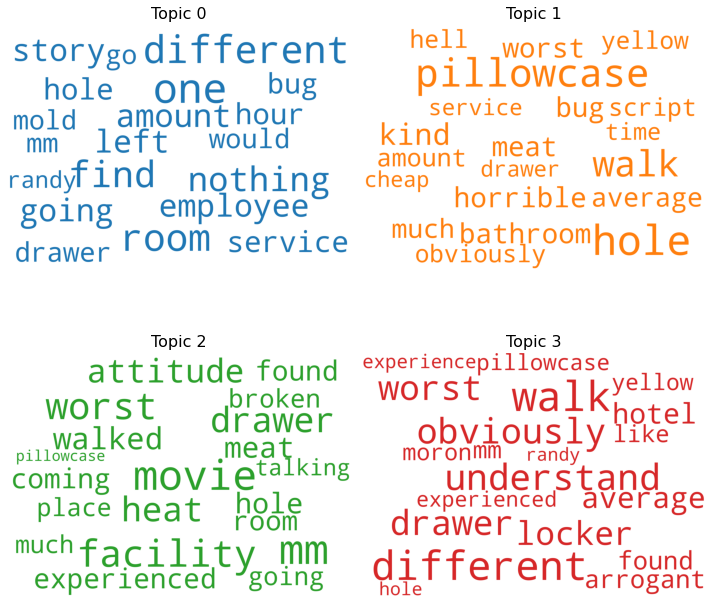

In [ ]:


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = hdp_DE.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##5.3 "NY" state topics modeling and visualisation

In [ ]:
nlp_df_NY=nlp_df[nlp_df['province']== 'NY']
nlp_df_NY.head()

name province                    geometry  reviews_rating                                 reviews_title_text  polarity  subjectivity                                             tokens                                             vector
1798  Super 8 Ithaca       NY  POINT (-76.50831 42.43601)               5  Mixed feelings... When I checked it, all was g...  0.227778      0.548765  [mixed, feeling, checked, great, went, room, g...  [-0.055937551063829784, 0.11207444680851066, -...
1799  Super 8 Ithaca       NY  POINT (-76.50831 42.43601)               5  Mixed feelings... Quick stay for show at State...  0.166667      0.375000  [mixed, feeling, quick, stay, show, state, the...  [0.09572810000000001, 0.11758285714285714, 0.0...
1800  Super 8 Ithaca       NY  POINT (-76.50831 42.43601)               4  Not fancy but no complaints at all. this is no...  0.254514      0.559722  [fancy, complaint, fancy, hotel, fine, place, ...  [-0.08529582857142858, 0.11763413714285717, -0...
1801  Super 8 Ithaca       NY  POINT (-76.50831 42.43601)               3  Not fancy but no complaints at all. It was a v...  0.090000      0.761111  [fancy, complaint, pleasant, room, carpet, flo...  [-0.0067055333333333285, -0.005026296666666671...
1802  Super 8 Ithaca       NY  POINT (-76.50831 42.43601)               4  Nice hotel right by Wegman's. Free breakfast! ...  0.399745      0.783673  [nice, hotel, right, wegman, free, breakfast, ...  [-0.090452252, 0.16873964, 0.16966070000000003...

In [ ]:
nlp_df_NY_good_rate=nlp_df_NY[nlp_df_NY['reviews_rating']>= 3]

In [ ]:
nlp_df_NY_bad_rate=nlp_df_NY[nlp_df_NY['reviews_rating']< 3]

###5.3.1 "NY" state "good_ rate"

In [ ]:
nlp_df_NY_good_rate['tokens']

1798     [mixed, feeling, checked, great, went, room, g...
1799     [mixed, feeling, quick, stay, show, state, the...
1800     [fancy, complaint, fancy, hotel, fine, place, ...
1801     [fancy, complaint, pleasant, room, carpet, flo...
1802     [nice, hotel, right, wegman, free, breakfast, ...
                               ...                        
28380    [bed, comfy, walking, distance, everything, to...
28381    [great, bb, aside, great, location, right, tow...
28382    [picturesque, getting, run, given, bed, breakf...
28383    [great, good, location, bb, great, location, w...
28385    [fuss, stay, inn, great, location, easy, walk,...
Name: tokens, Length: 863, dtype: object

- Implimation of diffrent topics modeling models

In [ ]:
bow_NY_good_rate,id2word_NY_good_rate, tf_idf_gensim_NY_good_rate =corpus(nlp_df_NY_good_rate)

In [ ]:
lsi_NY_good_rate,lda_NY_good_rate,hdp_NY_good_rate=topic_modeling(tf_idf_gensim_NY_good_rate,id2word_NY_good_rate)

Latent Semantic Analysis (LSA) or Latent Semantic Indexing (LSI):
[(0,
  '0.259*"great" + 0.246*"nice" + 0.243*"good" + 0.222*"stay" + 0.211*"hotel" '
  '+ 0.201*"room" + 0.199*"clean" + 0.187*"staff" + 0.166*"place" + '
  '0.163*"price"'),
 (1,
  '-0.595*"great" + -0.372*"service" + -0.225*"location" + -0.213*"excellent" '
  '+ 0.175*"ok" + 0.132*"clean" + -0.120*"large" + 0.119*"bed" + 0.106*"night" '
  '+ 0.105*"one"'),
 (2,
  '-0.620*"nice" + 0.274*"price" + 0.270*"good" + -0.247*"staff" + 0.224*"ok" '
  '+ 0.165*"great" + -0.137*"friendly" + 0.134*"money" + -0.128*"hotel" + '
  '0.122*"johnson"'),
 (3,
  '-0.571*"good" + -0.329*"nice" + -0.232*"place" + -0.212*"price" + '
  '0.139*"service" + -0.114*"value" + 0.111*"one" + -0.103*"stay" + '
  '0.094*"night" + 0.094*"excellent"'),
 (4,
  '0.399*"ok" + 0.313*"nice" + -0.288*"stay" + -0.274*"place" + '
  '0.210*"service" + 0.176*"hotel" + 0.175*"johnson" + 0.171*"howard" + '
  '-0.153*"comfortable" + 0.150*"old"'),
 (5,
  '0.411*"goo

- Topics modeling visualisation

There is an issue with pyLDAvis, i problemy have solution but i have to see with collab how to manage it or i will try to implement the given solution without collab to be more accessible pyLDAvis downloaded folder.

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=hdp_NY_good_rate, corpus=bow_NY_good_rate, dictionary=id2word_NY_good_rate)
vis

ValidationError: ignored

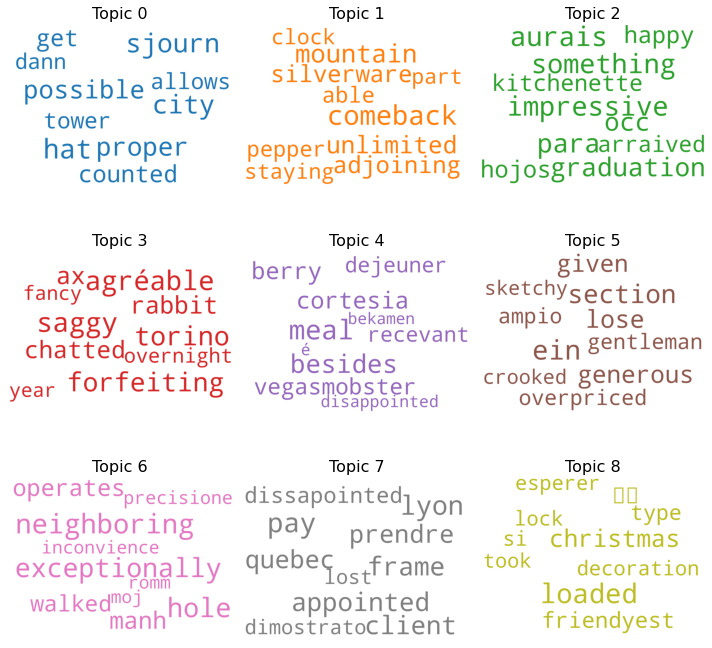

In [ ]:



cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = hdp_NY_good_rate.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###5.3.2 "NY" state "bad_rate"

In [ ]:
nlp_df_NY_bad_rate['tokens'].head(10)

1804    [one, better, came, check, many, area, main, f...
1808    [unclean, poor, service, first, checked, notic...
1810    [soggy, stay, wait, little, check, room, clean...
1815    [ok, place, sleep, maid, cleaned, room, never,...
1816    [adequate, accommodation, motel, room, odor, p...
1817    [stuffy, room, carpet, need, changed, bathroom...
1819    [never, wifi, broken, maid, cart, parked, dire...
1822    [best, priced, stay, nice, room, dusty, coffee...
1824    [stay, away, checked, late, friday, night, aro...
1836                                    [convenient, xxx]
Name: tokens, dtype: object

- Implimation of diffrent topics modeling models

In [ ]:
bow_NY_bad_rate,id2word_NY_bad_rate, tf_idf_gensim_NY_bad_rate =corpus(nlp_df_NY_bad_rate)

In [ ]:
lsi_NY_bad_rate,lda_NY_bad_rate,hdp_NY_bad_rate=topic_modeling(tf_idf_gensim_NY_bad_rate,id2word_NY_bad_rate)

Latent Semantic Analysis (LSA) or Latent Semantic Indexing (LSI):
[(0,
  '0.172*"room" + 0.169*"stay" + 0.164*"hotel" + 0.136*"night" + 0.134*"dirty" '
  '+ 0.132*"clean" + 0.130*"would" + 0.126*"bed" + 0.122*"old" + 0.119*"good"'),
 (1,
  '0.422*"la" + 0.419*"de" + 0.308*"le" + 0.186*"pa" + 0.172*"pour" + '
  '0.169*"salle" + 0.158*"chambre" + 0.156*"est" + 0.151*"plus" + '
  '0.144*"trop"'),
 (2,
  '-0.241*"johnson" + -0.241*"howard" + -0.234*"bad" + -0.194*"expected" + '
  '-0.192*"coffee" + -0.190*"ok" + -0.176*"much" + -0.175*"smelling" + '
  '-0.157*"musty" + -0.146*"good"'),
 (3,
  '0.199*"get" + 0.195*"good" + 0.185*"price" + -0.184*"bad" + '
  '-0.160*"smelling" + -0.146*"dirty" + -0.145*"johnson" + -0.145*"howard" + '
  '0.132*"sleep" + 0.128*"road"'),
 (4,
  '-0.212*"door" + -0.189*"table" + 0.185*"would" + 0.162*"clean" + '
  '0.157*"carpet" + -0.144*"difficult" + 0.131*"stay" + 0.126*"price" + '
  '-0.119*"floor" + -0.115*"open"'),
 (5,
  '0.266*"like" + 0.224*"trip" + 0.1

- Topics modeling visualisation

There is an issue with pyLDAvis, i problemy have solution but i have to see with collab how to manage it or i will try to implement the given solution without collab to be more accessible pyLDAvis downloaded folder.

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=hdp_NY_bad_rate, corpus=bow_NY_bad_rate, dictionary=id2word_NY_bad_rate)
vis

ValidationError: ignored

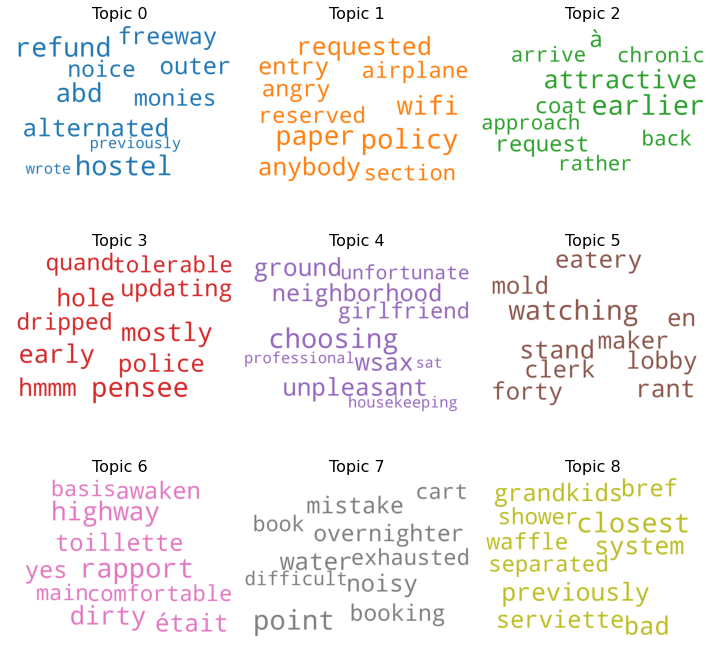

In [ ]:


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = hdp_NY_bad_rate.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()